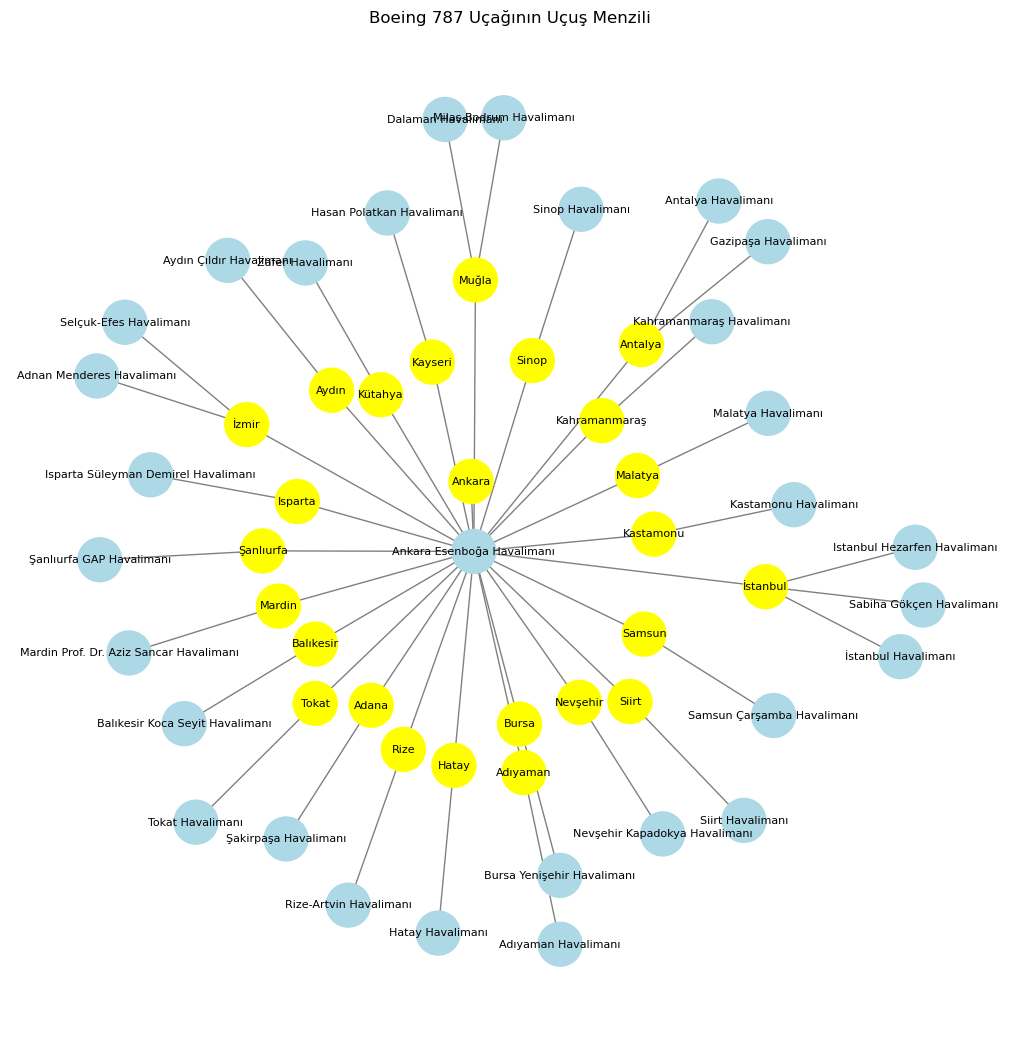

In [17]:
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Dünya'nın yarıçapı km cinsinden
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance_km = R * c
    return distance_km

# Veri seti oluşturma
data = {
    'Havalimanı Adı': [
        'Şakirpaşa Havalimanı', 'Ankara Esenboğa Havalimanı', 'Antalya Havalimanı',
        'Gazipaşa Havalimanı', 'Balıkesir Koca Seyit Havalimanı', 'Bursa Yenişehir Havalimanı',
        'Hasan Polatkan Havalimanı', 'Hatay Havalimanı', 'Isparta Süleyman Demirel Havalimanı',
        'İstanbul Havalimanı', 'Sabiha Gökçen Havalimanı', 'Adnan Menderes Havalimanı',
        'Zafer Havalimanı', 'Samsun Çarşamba Havalimanı', 'Sinop Havalimanı',
        'Şanlıurfa GAP Havalimanı', 'Adıyaman Havalimanı', 'Aydın Çıldır Havalimanı',
        'Malatya Havalimanı', 'Dalaman Havalimanı', 'Milas-Bodrum Havalimanı',
        'Nevşehir Kapadokya Havalimanı', 'Rize-Artvin Havalimanı', 'Istanbul Hezarfen Havalimanı',
        'Selçuk-Efes Havalimanı', 'Kahramanmaraş Havalimanı', 'Kastamonu Havalimanı',
        'Mardin Prof. Dr. Aziz Sancar Havalimanı', 'Siirt Havalimanı', 'Tokat Havalimanı'
    ],
    'Şehir': [
        'Adana', 'Ankara', 'Antalya', 'Antalya', 'Balıkesir', 'Bursa', 'Kayseri', 'Hatay', 'Isparta',
        'İstanbul', 'İstanbul', 'İzmir', 'Kütahya', 'Samsun', 'Sinop', 'Şanlıurfa', 'Adıyaman', 'Aydın',
        'Malatya', 'Muğla', 'Muğla', 'Nevşehir', 'Rize', 'İstanbul', 'İzmir', 'Kahramanmaraş', 'Kastamonu',
        'Mardin', 'Siirt', 'Tokat'
    ],
    'Koordinatlar': [
        '36.982222, 35.280278', '40.128056, 32.995', '36.900278, 30.794444', '36.299167, 32.301389',
        '39.5525, 27.010278', '40.255833, 29.562222', '39.8125, 30.528056', '36.372222, 36.298611',
        '37.855833, 30.366944', '41.261944, 28.742222', '40.894167, 29.309722', '38.289167, 27.156667',
        '39.111389, 30.13', '41.265556, 36.548611', '42.015833, 35.066389', '37.456667, 38.908333',
        '37.732222, 38.469167', '37.816111, 27.888889', '38.432222, 38.083056', '36.7125, 28.792778',
        '37.249444, 27.664722', '38.775278, 34.526667', '41.169167, 40.828889', '41.104444, 28.55',
        '37.950556, 27.329167', '37.538333, 36.951944', '41.316944, 33.796111', '37.232778, 40.640556',
        '37.978056, 41.839167', '40.311667, 36.373611'
    ]
}

# DataFrame oluşturma
df = pd.DataFrame(data)
df[['Enlem', 'Boylam']] = df['Koordinatlar'].str.split(', ', expand=True).astype(float)
df.drop('Koordinatlar', axis=1, inplace=True)

# Başlangıç havalimanı
start_airport = 'Ankara Esenboğa Havalimanı'

# Graph oluşturma
G = nx.Graph()

# Merkez düğümü ekleme (Ankara Esenboğa Havalimanı)
G.add_node(start_airport, node_type='airport', color='red')

# Şehirleri ve havalimanları ilişkilendirme
for _, row in df.iterrows():
    city = row['Şehir']
    airport = row['Havalimanı Adı']
    
    # Şehir düğümünü oluştur
    G.add_node(city, node_type='city', color='yellow')
    
    # Havalimanı düğümünü oluştur
    G.add_node(airport, node_type='airport', color='lightblue')
    
    # Şehir ile havalimanı arasında kenar oluştur
    G.add_edge(city, airport)

    # Ankara Esenboğa Havalimanı ile şehirler arasında kenar oluştur
    G.add_edge(start_airport, city)

# Grafı çizme
plt.figure(figsize=(10, 10))
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)  # Grafı yayılım yöntemi ile düzenleme
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, font_size=8, font_color='black', edge_color='gray')

plt.title('Boeing 787 Uçağının Uçuş Menzili')
plt.show()
